<a href="https://colab.research.google.com/github/SJin765/class_AI4dl/blob/main/class_AI4dl/week%5B1-16%5D/week2/chapter02_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


keras tensorflow, mnist 데이터셋

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [34]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

255로 나눠서 표준화, 데이터 0~1로 변환(분석 속도 더 빠름)

(표준화 안할 시 데이터의 범위 1~255)

(gradient 는 표준화된 데이터 기준으로 만들어짐)

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 4ms/step - loss: 0.2636 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9883


**Using the model to make predictions**

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 67ms/step


array([1.8033880e-08, 2.7143656e-09, 1.5156325e-05, 5.1681833e-05,
       1.4140165e-12, 8.5540186e-08, 6.0481121e-12, 9.9993229e-01,
       3.8966217e-08, 6.2472253e-07], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9999323

In [15]:
test_labels[0]

7

**Evaluating the model on new data**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9788
test_acc: 0.9787999987602234


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

### Vectors (rank-1 tensors)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

### Matrices (rank-2 tensors)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [24]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
train_images.ndim

3

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

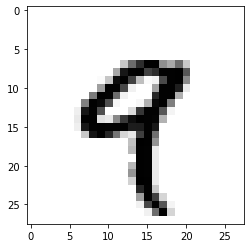

In [28]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [29]:
train_labels[4]

9

1st digit visualization

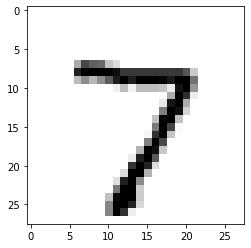

In [31]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

In [33]:
test_labels[0]

7

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

use naïve version of relu and add functions.

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [38]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [35]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [39]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.91 s


속도를 위해서 vectorized된 코드 사용 권장?

### Broadcasting

In [40]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [41]:
y = np.expand_dims(y, axis=0)

In [42]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

using broadcasting with my own example.

In [43]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

array([0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
       0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569])

In [44]:
X

array([[0.19663445, 0.08403892, 0.30412067, 0.24951075, 0.74308183,
        0.83737138, 0.59072518, 0.60263978, 0.53950712, 0.53874789],
       [0.60223443, 0.31856128, 0.44027288, 0.7835423 , 0.82984625,
        0.97014209, 0.93642511, 0.60602203, 0.49087592, 0.06911533],
       [0.84854174, 0.99597549, 0.48242689, 0.76213116, 0.21435291,
        0.40894279, 0.18473246, 0.4598386 , 0.63942352, 0.80736568],
       [0.46537554, 0.7482583 , 0.37723098, 0.86671329, 0.93549886,
        0.4365996 , 0.4816859 , 0.24079099, 0.73667746, 0.3089972 ],
       [0.6948152 , 0.16067996, 0.34788601, 0.16299068, 0.95868132,
        0.93893517, 0.43023307, 0.15094256, 0.68288146, 0.07827034],
       [0.61615066, 0.32898263, 0.87827117, 0.79006843, 0.03180115,
        0.58473327, 0.05994717, 0.86213317, 0.06313344, 0.53619191],
       [0.73970907, 0.32269201, 0.26125263, 0.6674124 , 0.37101801,
        0.54426631, 0.77982488, 0.47416593, 0.86836469, 0.74139865],
       [0.69450216, 0.41299441, 0.0935374

In [45]:
y

array([0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
       0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569])

In [46]:
y = np.expand_dims(y, axis=0)
Y = np.concatenate([y] * 32, axis=0)

In [47]:
Y

array([[0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
        0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569],
       [0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
        0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569],
       [0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
        0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569],
       [0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
        0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569],
       [0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
        0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569],
       [0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
        0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569],
       [0.7216086 , 0.08200131, 0.50479   , 0.09321126, 0.36235753,
        0.32619737, 0.22355418, 0.95991241, 0.03348012, 0.24551569],
       [0.7216086 , 0.08200131, 0.50479  

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary